In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Набор данных взят с https://www.kaggle.com/aungpyaeap/fish-market
# Параметры нескольких популярных промысловых рыб
# length 1 = Body height
# length 2 = Total Length
# length 3 = Diagonal Length
fish_data = pd.read_csv("datasets/Fish.csv", delimiter=',')
print(fish_data)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [12]:
x_label = 'Length1'
y_label = 'Weight'
data = fish_data[[x_label, y_label]]
print(data)

     Length1  Weight
0       23.2   242.0
1       24.0   290.0
2       23.9   340.0
3       26.3   363.0
4       26.5   430.0
..       ...     ...
154     11.5    12.2
155     11.7    13.4
156     12.1    12.2
157     13.2    19.7
158     13.8    19.9

[159 rows x 2 columns]


In [13]:
val_test_size = round(0.2*len(data))
print(val_test_size)

32


In [14]:
my_code = "Osmanov"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [15]:
random_state = my_seed
train_val, test = train_test_split(data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [16]:
train_x = np.array(train[x_label]).reshape(-1,1)
train_y = np.array(train[y_label]).reshape(-1,1)

val_x = np.array(val[x_label]).reshape(-1,1)
val_y = np.array(val[y_label]).reshape(-1,1)

test_x = np.array(test[x_label]).reshape(-1,1)
test_y = np.array(test[y_label]).reshape(-1,1)

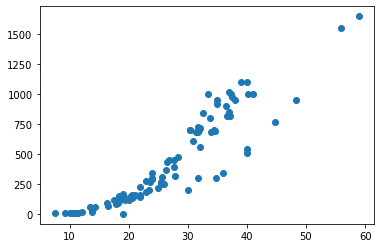

In [17]:
plt.plot(train_x, train_y, 'o')
plt.show()

In [18]:
model1 = linear_model.LinearRegression()
model1.fit(train_x, train_y)

LinearRegression()

In [19]:
print(model1.coef_, model1.intercept_)

a = model1.coef_[0]
b = model1.intercept_
print(a, b)

[[33.5851569]] [-466.77367766]
[33.5851569] [-466.77367766]


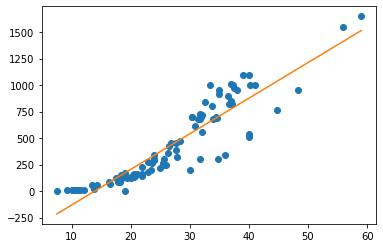

In [20]:
x = np.linspace(min(train_x), max(train_x), 100)
y = a * x + b

plt.plot(train_x, train_y, 'o')
plt.plot(x, y)
plt.show()

In [21]:
val_predicted = model1.predict(val_x)
mse1 = mean_squared_error(val_y, val_predicted)
print(mse1)

10522.746642045708


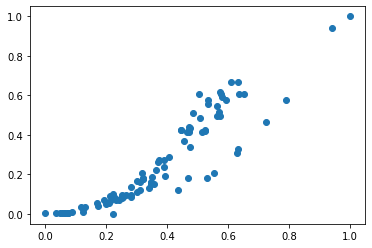

In [22]:
scaler_x = MinMaxScaler()
scaler_x.fit(train_x)
scaled_train_x = scaler_x.transform(train_x)

scaler_y = MinMaxScaler()
scaler_y.fit(train_y)
scaled_train_y = scaler_y.transform(train_y)

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.show()

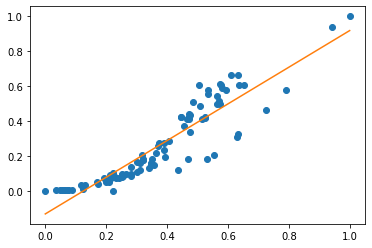

In [23]:
model2 = linear_model.LinearRegression()
model2.fit(scaled_train_x, scaled_train_y)
a = model2.coef_[0]
b = model2.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [24]:
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model2.predict(scaled_val_x)

mse2 = mean_squared_error(scaled_val_y, val_predicted)
print(mse2)

0.003865104368060873


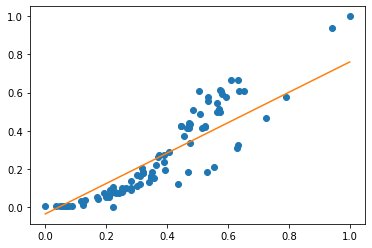

In [25]:
model3 = linear_model.Lasso(alpha=0.01)
model3.fit(scaled_train_x, scaled_train_y)
a = model3.coef_[0]
b = model3.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [26]:
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model3.predict(scaled_val_x)

mse3 = mean_squared_error(scaled_val_y, val_predicted)
print(mse3)

0.007804112133546776


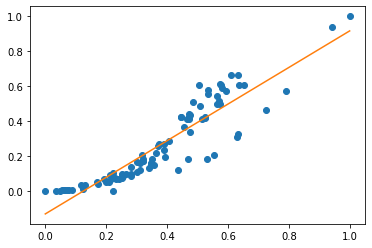

In [27]:
model4 = linear_model.Ridge(alpha=0.01)
model4.fit(scaled_train_x, scaled_train_y)
a = model4.coef_[0]
b = model4.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [28]:
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model4.predict(scaled_val_x)

mse4 = mean_squared_error(scaled_val_y, val_predicted)
print(mse4)

0.0038793552121091307


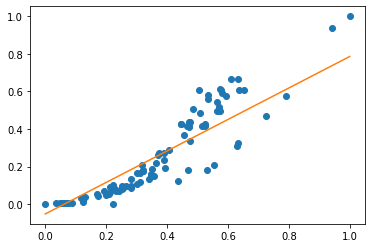

In [29]:
model5 = linear_model.ElasticNet(alpha=0.01, l1_ratio = 0.01)
model5.fit(scaled_train_x, scaled_train_y)
a = model5.coef_[0]
b = model5.intercept_

x = np.linspace(min(scaled_train_x), max(scaled_train_x), 100)
y = a * x + b

plt.plot(scaled_train_x, scaled_train_y, 'o')
plt.plot(x, y)
plt.show()

In [30]:
scaled_val_x = scaler_x.transform(val_x)
scaled_val_y = scaler_y.transform(val_y)

val_predicted = model5.predict(scaled_val_x)

mse5 = mean_squared_error(scaled_val_y, val_predicted)
print(mse5)

0.006808032341671167


In [31]:
print(mse2, mse3, mse4, mse5)

0.003865104368060873 0.007804112133546776 0.0038793552121091307 0.006808032341671167


In [32]:
scaled_test_x = scaler_x.transform(test_x)
scaled_test_y = scaler_y.transform(test_y)

test_predicted = model2.predict(scaled_test_x)

mse_test = mean_squared_error(scaled_test_y, test_predicted)
print(mse_test)

0.010076330966558723
